## 1.1 Loading Data

In [2303]:
import numpy as np
import math as math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.figure_factory import create_distplot
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)

In [2304]:
housingdf = pd.read_csv('./Datasets/train.csv')
housingdf = housingdf.drop(['Id'], axis = 1)

In [2305]:
testdf = pd.read_csv('./Datasets/test.csv')
testdf = testdf.drop(['Id'], axis = 1)

In [2306]:
print(housingdf.shape)
print(testdf.shape)

(1460, 80)
(1459, 79)


In [2307]:
housingdf.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [2308]:
testdf.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [2309]:
totaldf = pd.concat([housingdf, testdf], axis = 0, ignore_index = False)


In [2310]:
#making a copy
totalhousing = totaldf.copy()

In [2311]:
#drop the response variable
housingtrainy = housingdf[['SalePrice']]
totalhousing = totalhousing.drop(['SalePrice'], axis = 1)

In [2312]:
totalhousing.shape

(2919, 79)

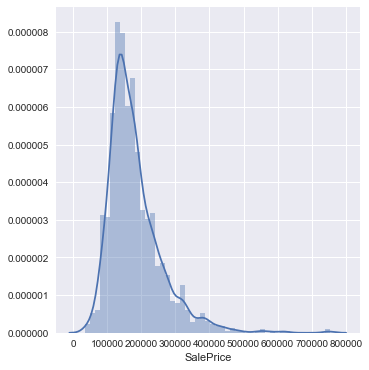

In [2313]:
plt.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.subplot(1, 2, 1)
sns.distplot(housingdf['SalePrice'])


In [2314]:
hist_data = [np.array(np.log1p(housingdf['SalePrice']))]
group_labels = ['Log Sales Price Distribution']
fig = ff.create_distplot(hist_data, group_labels, bin_size=.1)
py.offline.iplot(fig, filename='Basic Distplot')

## 2.1 Imputation & Visualization

In [2315]:
import missingno as msno
%matplotlib inline

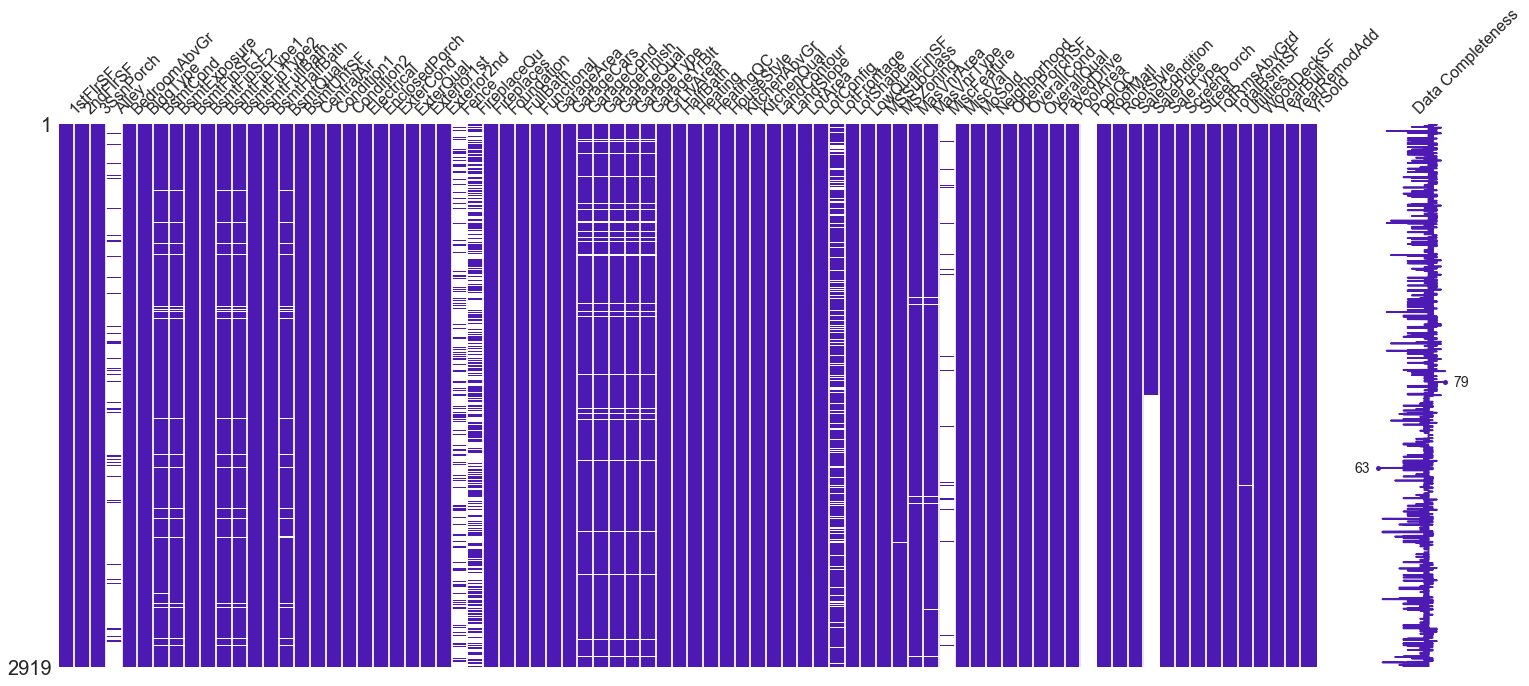

In [2316]:
#overall missing data visualization
msno.matrix(totaldf, color=(0.3, 0.1, 0.7), labels = True)

In [2317]:
missingcolumns = totalhousing.isnull().sum().sort_values(ascending = False)
missingpercentage = (totalhousing.isnull().sum()/len(totaldf)).sort_values(ascending = False)
missingdf = pd.DataFrame({'missing_column': missingcolumns.index.tolist(), 'missing_numbers': missingcolumns.values.tolist(), 'missing_percentage': missingpercentage.values.tolist()})
missingdf = missingdf[missingdf['missing_numbers']>0]
missingdf



,missing_column,missing_numbers,missing_percentage
0,PoolQC,2909,0.996574
1,MiscFeature,2814,0.964029
2,Alley,2721,0.932169
3,Fence,2348,0.804385
4,FireplaceQu,1420,0.486468
5,LotFrontage,486,0.166495
6,GarageFinish,159,0.054471
7,GarageQual,159,0.054471
8,GarageYrBlt,159,0.054471
9,GarageCond,159,0.054471


In [2318]:
#missing data with barplots

missing_counts = go.Bar(x=missingdf['missing_column'].tolist(),
                  y=missingdf['missing_numbers'].tolist(),
                  marker=dict(color='rgb(166,206,227)'))


data = [missing_counts]

layout = go.Layout(title="Missing Data Counts",
                xaxis=dict(title='Missing Columns',tickangle=30),
                yaxis=dict(title='Counts'))

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)





In [2319]:
#missing data with barplots

missing_percentage = go.Bar(x=missingdf['missing_column'].tolist(),
                  y=missingdf['missing_percentage'].tolist(),
                  marker=dict(color='rgb(166,206,227)'))


data = [missing_percentage]

layout = go.Layout(title="Missing Data Percentage",
                xaxis=dict(title='Missing Columns',tickangle=30),
                yaxis=dict(title='Missing Percentage'))

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)




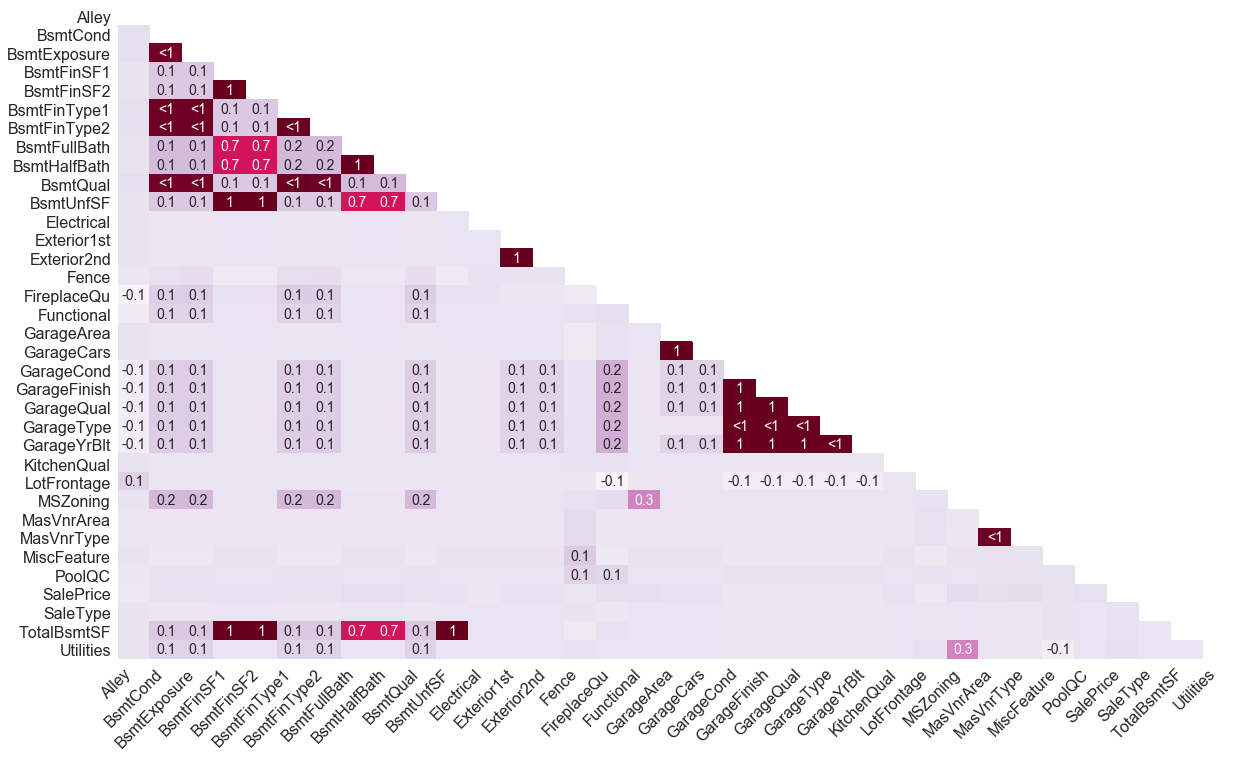

In [2320]:
#correlation between missing data
msno.heatmap(totaldf, cmap = 'PuRd')

In [2321]:
totaldf.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [2322]:
totalmissingdf = totaldf[missingdf['missing_column'].tolist()]

## 2.2 Garage Year Imputation

In [2323]:
# totalhousing.GarageYrBlt = np.where(totalhousing.GarageYrBlt != totalhousing.GarageYrBlt, totalhousing.YearBuilt, totalhousing.GarageYrBlt)
# Example
# a = np.array([2,2,0,6,8])
# b = np.array([np.nan,3,np.nan,4,5])
# c = np.array([0,0,0,0,0])
# d = np.array([1,1,1,1,1])
# np.where(np.isnan(b), a, b)



In [2324]:
totalhousing['HasGarage'] = np.where(np.isnan(totalhousing['GarageYrBlt']), 0, 1)



In [2325]:
#some of garage year built are earlier than year built, causing negative numbers, should come back and impute
totalhousing['GarageYearDiff'] = totalhousing['GarageYrBlt'] - totalhousing['YearBuilt']
# totalhousing['GarageYearDiff'] = [0 if math.isnan(i) else i for i in totalhousing['GarageYearDiff']]
totalhousing['GarageYearDiff'] = np.where(np.isnan(totalhousing['GarageYearDiff']), 0, totalhousing['GarageYearDiff'])
totalhousing['GarageYearDiff'] = np.where(totalhousing['GarageYearDiff'] < 0, 0, totalhousing['GarageYearDiff'])
totalhousing['GarageYearDiff'] = np.where(totalhousing['GarageYearDiff'] == 201, 1, totalhousing['GarageYearDiff'])
pd.unique(totalhousing['GarageYearDiff'])



array([   0.,   83.,   62.,   54.,    1.,    2.,   51.,    7.,   15.,
         69.,    5.,   35.,   56.,   14.,   20.,   40.,   48.,   50.,
         12.,   78.,  101.,   17.,    3.,   18.,    4.,   29.,   45.,
         26.,   11.,   53.,   88.,  123.,   21.,   38.,   77.,   44.,
         32.,   22.,   13.,   70.,   85.,   33.,   58.,    6.,    8.,
         27.,   74.,   37.,   95.,   43.,   42.,    9.,   57.,   36.,
         47.,   59.,   99.,   64.,  106.,   24.,   19.,   10.,   34.,
         49.,   41.,   46.,   79.,   31.,   73.,   30.,   87.,   52.,
         72.,   39.,   75.,   60.,   93.,   89.,   98.,   16.,   86.,
         71.,  113.,   55.,   28.,   25.,   65.,   61.,   67.,   68.,
         80.,   23.,  100.,   82.,   91.])

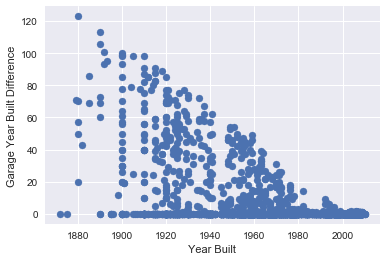

In [2326]:
#Visualize garage year imputation
plt.scatter(totalhousing['YearBuilt'], totalhousing['GarageYearDiff'])
plt.xlabel('Year Built')
plt.ylabel('Garage Year Built Difference')
matplotlib.rcParams['figure.figsize'] = (10, 10)



## 2.3 Year Remodeling Imputation

In [2327]:
#create a column to check if the remodeled year is equal to year built
totalhousing['IsRemod'] = np.where(totalhousing['YearRemodAdd'] == totalhousing['YearBuilt'], 0, 1)


In [2328]:
#create a column to store the year difference between every remodelling year and year built
totalhousing['RemodYearDiff'] = totalhousing['YearRemodAdd'] - totalhousing['YearBuilt']
totalhousing['RemodYearDiff'] = np.where(totalhousing['RemodYearDiff'] < 0, 0, totalhousing['RemodYearDiff'])
pd.unique(totalhousing['RemodYearDiff'])

array([  0,   1,  55,   2,  19,  11,  72,   7,  20,  33,  49,  40,  23,
        30,  36,  54,   5,  88,  16,   6,  76,  29,  24,  35,  53,  71,
        67,  85, 110,  86,  18,  57,  47,  43,  25,  62,  14,  15,  27,
        26,  78,  59,  38,   9,  51,  83, 101,  32,   3,  39,  10,  52,
        50,   8,  48,  79,  58,  82,  17, 122,  65,  34,  75,  60,  42,
        77,  28,  22,  61,  46,  89,  80,  13,  63,  90,  70,  37, 100,
        44,   4,  81, 107,  21,  64, 111,  69,  31,  68,  96, 108,  56,
        92, 123,  94,  45,  87,  41,  74,  98,  12, 103, 106,  93, 104,
        73, 121, 115,  95,  84, 112,  97, 127, 109,  66, 116, 105])

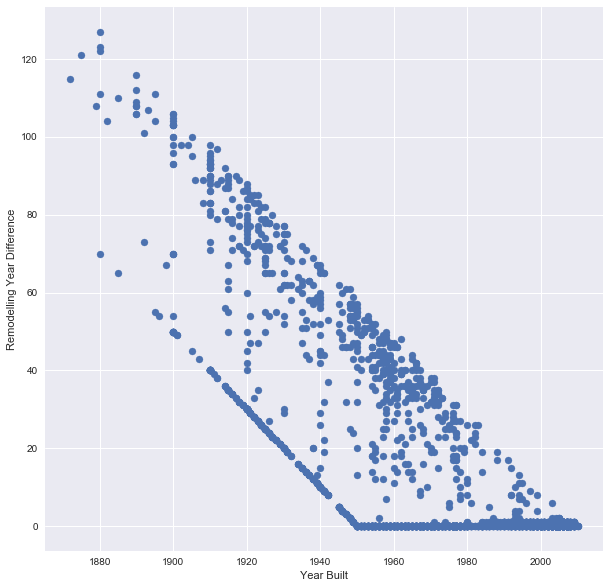

In [2329]:
#Visualize year remodeling imputation
plt.scatter(totalhousing['YearBuilt'], totalhousing['RemodYearDiff'])
plt.xlabel('Year Built')
plt.ylabel('Remodelling Year Difference')
matplotlib.rcParams['figure.figsize'] = (10, 10)

## 2.4 Ordinal Variable Imputation

In [2330]:
ordinal1 = ["FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "Fence", 'PoolQC']

In [2331]:
totalhousing[ordinal1] = totalhousing[ordinal1] = totalhousing[ordinal1].replace(np.nan, 'None')

In [2332]:
ordinal2 = ["LotShape","LandContour", "LandSlope", "BldgType", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
           "BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual", "Functional"]


In [2333]:
for i in ordinal2:
    totalhousing[i] = totalhousing[i].fillna(totalhousing[i].mode()[0])

In [2334]:
totalhousing[ordinal2].isnull().sum()

LotShape        0
LandContour     0
LandSlope       0
BldgType        0
OverallQual     0
OverallCond     0
ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
HeatingQC       0
CentralAir      0
KitchenQual     0
Functional      0
dtype: int64

## 2.5 Nominal Variable Imputation

In [2335]:
nominal1 = ['MiscFeature', 'Alley', 'GarageType', 'MasVnrType']


In [2336]:
totalhousing[nominal] = totalhousing[nominal].replace(np.nan, 'None')

In [2337]:
nominal2 = ['MSZoning', 'Utilities', 'SaleType', 'Exterior1st', 'Exterior2nd', 'Electrical']

In [2338]:
for i in nominal2:
    totalhousing[i] = totalhousing[i].fillna(totalhousing[i].mode()[0])

In [2339]:
totalhousing[nominal2].isnull().sum()

MSZoning       0
Utilities      0
SaleType       0
Exterior1st    0
Exterior2nd    0
Electrical     0
dtype: int64

## 2.6 Continuous Variable Imputation

In [2340]:
continuous1 = ['LotFrontage', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageArea', 'GarageCars'] 

In [2341]:
totalhousing[continuous] = totalhousing[continuous].fillna(totalhousing[continuous].median())

## 2.7 Zero Variance and Near-Zero Variance Imputation

In [2342]:
zerovariance = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'PoolQC', 'MiscVal']


In [2343]:
totalhousing.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [2344]:
# drop all zero variance and near-zero variance columns
totalhousing = totalhousing.drop(zerovariance, axis = 1)


In [2345]:
#drop yearremodadd and garageyrblt
totalhousing = totalhousing.drop(['YearRemodAdd', 'GarageYrBlt'], axis = 1)

In [2346]:
totalhousing.shape

(2919, 72)

In [2347]:
totalhousing.isnull().sum().sort_values(ascending = False)

RemodYearDiff     0
IsRemod           0
ExterCond         0
ExterQual         0
Exterior1st       0
Exterior2nd       0
Fence             0
FireplaceQu       0
Fireplaces        0
Foundation        0
FullBath          0
Functional        0
GarageArea        0
GarageCars        0
GarageCond        0
GarageFinish      0
GarageQual        0
EnclosedPorch     0
Electrical        0
Condition1        0
BsmtFinSF1        0
2ndFlrSF          0
Alley             0
BedroomAbvGr      0
BldgType          0
BsmtCond          0
BsmtExposure      0
BsmtFinSF2        0
CentralAir        0
BsmtFinType1      0
                 ..
RoofStyle         0
SaleCondition     0
SaleType          0
TotRmsAbvGrd      0
Neighborhood      0
TotalBsmtSF       0
WoodDeckSF        0
YearBuilt         0
YrSold            0
HasGarage         0
GarageYearDiff    0
OpenPorchSF       0
MoSold            0
Heating           0
LotArea           0
HeatingQC         0
HouseStyle        0
KitchenAbvGr      0
KitchenQual       0


## 2.1 Kaggle Train Test Split

In [2348]:
housingtrainx = totalhousing.iloc[0:1460, :]

In [2349]:
housingtrain = pd.concat([housingtrainx, housingtrainy], axis = 1)

In [2350]:
housingtest = totalhousing.iloc[1460:2919, :].copy()

In [2351]:
train.shape

(1460, 72)

In [2352]:
test.shape

(1459, 72)

In [2353]:
housingtrain.to_csv('./Datasets/train_Wenchang.csv')

In [2354]:
housingtest.to_csv('./Datasets/test_Wenchang.csv')

## 2.2 Statistical Analysis & Visualization

In [2355]:
continuous2 = ["LotFrontage", "LotArea", "YearBuilt", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", 
               "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "ScreenPorch", 'MoSold', 'YrSold', 'SalePrice']


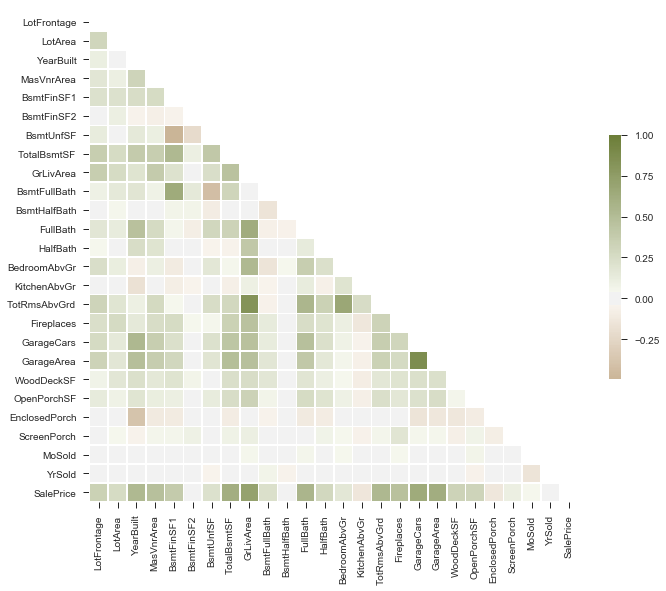

In [2356]:
#create a correlation matrix with all numeric columns: Pearson

sns.set(style="ticks")

# take the numerical columns
data1 = pd.DataFrame(data= housingtrain[continuous2],
                 columns = housingtrain[continuous2].columns.tolist())

# Compute the correlation matrix
corr1 = data1.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(50, 100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})




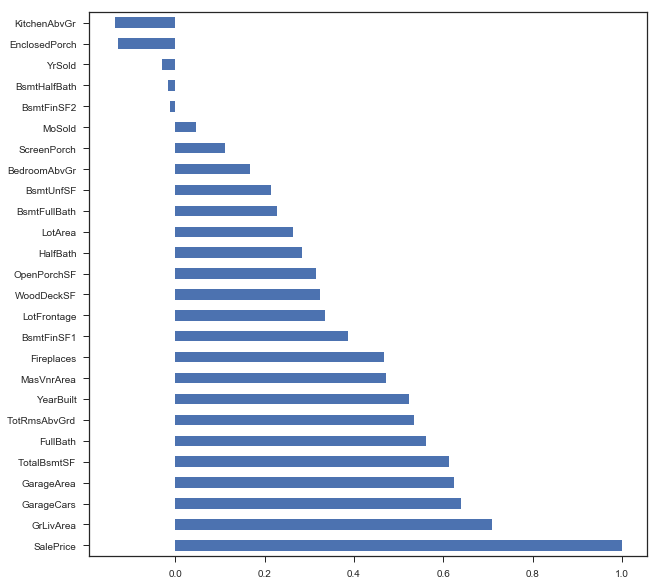

In [2357]:
#top10 correlated continuous variables
correlationchart = corr1['SalePrice'].sort_values(ascending = False)
correlationchart.plot.barh()



In [2358]:
# ordinal2 = ["LotShape", "LandContour", "LandSlope", "BldgType", 
#             "OverallQual", "OverallCond", "ExterQual", "ExterCond", 
#            "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
#            "BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual", 
#            "Functional", "FireplaceQu", "GarageFinish", "GarageQual", 
#            "GarageCond", "PavedDrive", "Fence"]

In [2359]:
# ordinaldf = housingtrain[ordinal2].copy()


In [2360]:
# #Ordinal Variables Correlation Plot: Kendall
# sns.set(style="ticks")

# # take the numerical columns
# data2 = pd.DataFrame(data= housingtrain[ordinal2],
#                  columns=housingtrain[ordinal2].columns.tolist())

# # Compute the correlation matrix
# corr2 = data2.corr(method = 'kendall')

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr2, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(75, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [2361]:
# corr = data.corr(method = 'kendall')
# corr

In [2362]:
# #Correlation between Ordinal Variables and Sales Prices: Spearman
# sns.set(style="ticks")

# # take the numerical columns
# data = pd.DataFrame(data= numericdf,
#                  columns=numericdf.columns.tolist())

# # Compute the correlation matrix
# corr = data.corr(method = 'spearman')

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(100, 125, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [2363]:
housingtrain.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,...,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YrSold,HasGarage,GarageYearDiff,IsRemod,RemodYearDiff,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,2.866438,443.639726,46.549315,0.425342,0.057534,567.240411,21.954110,0.613014,...,6.517808,1057.429452,94.244521,1971.267808,2007.815753,0.944521,5.265753,0.476712,13.597945,180921.195890
std,386.587738,436.528436,0.815778,456.098091,161.319273,0.518911,0.238753,441.866955,61.119149,0.644666,...,1.625393,438.705324,125.338794,30.202904,1.328095,0.228992,16.150061,0.499629,24.476465,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,1872.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,882.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.000000,0.000000,...,5.000000,795.750000,0.000000,1954.000000,2007.000000,1.000000,0.000000,0.000000,0.000000,129975.000000
50%,1087.000000,0.000000,3.000000,383.500000,0.000000,0.000000,0.000000,477.500000,0.000000,1.000000,...,6.000000,991.500000,0.000000,1973.000000,2008.000000,1.000000,0.000000,0.000000,0.000000,163000.000000
75%,1391.250000,728.000000,3.000000,712.250000,0.000000,1.000000,0.000000,808.000000,0.000000,1.000000,...,7.000000,1298.250000,168.000000,2000.000000,2009.000000,1.000000,0.000000,1.000000,20.000000,214000.000000
max,4692.000000,2065.000000,8.000000,5644.000000,1474.000000,3.000000,2.000000,2336.000000,552.000000,3.000000,...,14.000000,6110.000000,857.000000,2010.000000,2010.000000,1.000000,123.000000,1.000000,123.000000,755000.000000


In [2364]:
#Boxplot with Median Price and Neighborhoods



N = len(pd.unique(housingtrain.Neighborhood))     # Number of boxes

# generate an array of rainbow colors by fixing the saturation and lightness of the HSL representation of colour 
# and marching around the hue. 

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

#loading the data with filters
data = [{
    'y': housingtrain.SalePrice[housingtrain.Neighborhood == j],
    'name': j,
    'type':'box',
    'marker':{'color': c[i]}
    } for i, j in enumerate(pd.unique(housingtrain.Neighborhood))]


# format the layout
layout = go.Layout(title="Housing Sale Price by Neighborhoods",
                xaxis=dict(title='Neighborhood'),
                yaxis=dict(title='Housing Sale Price'))


fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)


In [2365]:
#Boxplot with Price and Overall Quality

N = len(pd.unique(housingtrain.OverallQual))     # Number of boxes

# generate an array of rainbow colors by fixing the saturation and lightness of the HSL representation of colour 
# and marching around the hue. 

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

#loading the data with filters
data = [{
    'y': housingtrain.SalePrice[housingtrain.OverallQual == j],
    'name': j,
    'type':'box',
    'marker':{'color': c[i]}
    } for i, j in enumerate(pd.unique(housingtrain.OverallQual))]


# format the layout
layout = go.Layout(title="Housing Sale Price by Overall Quality",
                xaxis=dict(title='Overall Quality'),
                yaxis=dict(title='Housing Sale Price'))


fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)


In [2366]:
from datetime import datetime
saletime = housingtrain.copy()
saletime['Saletime'] = saletime['YrSold'].map(str) + '/' + saletime['MoSold'].map(str) 
saletime['Saletime'] = pd.to_datetime(saletime['Saletime'], format = '%Y/%m')
saletimedf = pd.concat([saletime['Saletime'], saletime['SalePrice']], axis = 1)
saletimedf = saletimedf.sort_values(by = 'Saletime')
saletimedf.Saletime = saletimedf.Saletime.map(lambda x: x.strftime('%Y/%m'))
pd.unique(saletimedf.Saletime)

array(['2006/01', '2006/02', '2006/03', '2006/04', '2006/05', '2006/06',
       '2006/07', '2006/08', '2006/09', '2006/10', '2006/11', '2006/12',
       '2007/01', '2007/02', '2007/03', '2007/04', '2007/05', '2007/06',
       '2007/07', '2007/08', '2007/09', '2007/10', '2007/11', '2007/12',
       '2008/01', '2008/02', '2008/03', '2008/04', '2008/05', '2008/06',
       '2008/07', '2008/08', '2008/09', '2008/10', '2008/11', '2008/12',
       '2009/01', '2009/02', '2009/03', '2009/04', '2009/05', '2009/06',
       '2009/07', '2009/08', '2009/09', '2009/10', '2009/11', '2009/12',
       '2010/01', '2010/02', '2010/03', '2010/04', '2010/05', '2010/06',
       '2010/07'], dtype=object)

In [2367]:
#Boxplot with Price and Time

N = len(pd.unique(saletimedf.Saletime))     # Number of boxes
enumeratelist = pd.unique(saletimedf.Saletime)


# generate an array of rainbow colors by fixing the saturation and lightness of the HSL representation of colour 
# and marching around the hue. 

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

#loading the data with filters
data = [{
    'y': saletimedf.SalePrice[saletimedf.Saletime == j],
    'name': j,
    'type':'box',
    'marker':{'color': c[i]}
    } for i, j in enumerate(enumeratelist)]


# format the layout
layout = go.Layout(title="Housing Sale Price by Year",
                xaxis=dict(title='Time'),
                yaxis=dict(title='Housing Sale Price'))


fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)




In [2368]:
# #Median Price with Time
# saletimegroup = saletimedf.groupby('Saletime').median()
# saletimegroup.sort(by = 'Saletime')
# sorted(pd.unique(saletime.dt.date))

## 2.3 Feature Engineering



In [2451]:
housingtrain.HalfBath = np.where(housingtrain.HalfBath == 0, np.median(housingtrain.HalfBath), housingtrain.HalfBath)
housingtrain.FullBath = np.where(housingtrain.FullBath == 0, np.median(housingtrain.FullBath), housingtrain.FullBath)
housingtrain.BedroomAbvGr = np.where(housingtrain.BedroomAbvGr == 0, np.median(housingtrain.BedroomAbvGr), housingtrain.BedroomAbvGr)



In [2452]:
# bathroomratio = bath/room
housingtrain['Bath_Capacitance'] = (housingtrain['FullBath']+housingtrain['HalfBath']) /housingtrain['BedroomAbvGr']


In [2453]:
#garageroomratio = garage/room
housingtrain['Parking_Capacitance']=housingtrain.GarageCars/housingtrain.BedroomAbvGr


In [2632]:
housingtrain.columns

Index(['1stFlrSF', '2ndFlrSF', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Electrical', 'EnclosedPorch', 'ExterCond',
       'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea',
       'LotConfig', 'LotFrontage', 'LotShape', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'RoofStyle',
       'SaleCondition', 'SaleType', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'W

In [2476]:
#landscape = lotshape * land contour
# housingtrain['landscape']


In [2455]:
#saletype score



In [2456]:
#neighborhood score



## Preprocessing

## 3.1 Encoding

In [2824]:
#we create a private train set and a private test set within the kaggle train set in order to
#find best regularization parameter only based on private train set. 
privateset = housingtrain.copy()

In [2825]:
privateset = pd.get_dummies(privateset, drop_first=True, dummy_na=True)

privateset.head(10)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,...,SaleCondition_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan
0,856,854,3.0,706.0,0.0,1.0,0.0,150.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1262,0,3.0,978.0,0.0,0.0,1.0,284.0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,920,866,3.0,486.0,0.0,1.0,0.0,434.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,961,756,3.0,216.0,0.0,1.0,0.0,540.0,272,1,...,0,0,0,0,0,0,0,0,1,0
4,1145,1053,4.0,655.0,0.0,1.0,0.0,490.0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,796,566,1.0,732.0,0.0,1.0,0.0,64.0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1694,0,3.0,1369.0,0.0,1.0,0.0,317.0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,1107,983,3.0,859.0,32.0,1.0,0.0,216.0,228,2,...,0,0,0,0,0,0,0,0,1,0
8,1022,752,2.0,0.0,0.0,0.0,0.0,952.0,205,2,...,0,0,0,0,0,0,0,0,1,0
9,1077,0,2.0,851.0,0.0,1.0,0.0,140.0,0,2,...,0,0,0,0,0,0,0,0,1,0


## 3.2 Private Train Test Split

In [2894]:
import sklearn.model_selection as ms

x_train, x_test, y_train, y_test = ms.train_test_split(privateset.loc[:, privateset.columns != 'SalePrice'], privateset['SalePrice'], 
                                                       test_size=1/5, random_state=0)

print('Original: {}, {}'.format(privateset.shape, privateset.shape))
print('Training: {}, {}'.format(x_train.shape, y_train.shape))
print('Test: {}, {}'.format(x_test.shape, y_test.shape))




Original: (1460, 274), (1460, 274)
Training: (1168, 273), (1168,)
Test: (292, 273), (292,)


## 3.2 Normalizing and Scaling

In [2895]:
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline

In [2896]:
# x_train = preprocessing.RobustScaler().fit(x_train)
# x_test = preprocessing.RobustScaler().fit(x_test)
# x_train = preprocessing.RobustScaler(x_train)
# x_test = preprocessing.RobustScaler(x_test)

In [2897]:
#log transform the sale prices
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [2922]:
scaler = preprocessing.StandardScaler()

In [2899]:
#standardize and normalize the features
# x_train = pd.DataFrame(data = scaler.fit_transform(x_train), columns = x_train.columns)
# x_test = pd.DataFrame(data = scaler.fit_transform(x_test), columns = x_test.columns)

In [ ]:
from scipy.stats import norm, skew
numeric_feats = house_train_test_log.dtypes[house_train_test_log.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = house_train_test_log[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]
skewed_features = skewness.index
house_train_test_log[skewed_features] = np.log1p(house_train_test_log[skewed_features]



In [2900]:
# kaggleset = privateset.copy()

In [2901]:
# public_x = kaggleset.loc[:, kaggleset.columns != 'SalePrice']
# public_y = kaggleset.SalePrice

In [2902]:
# public_x = pd.DataFrame(data = scaler.fit_transform(public_x), columns = public_train.columns)
# public_y = np.log1p(public_y)

## Modelling

## 4.1 Regularized Linear Regression: Ridge 

In [2903]:
def rmse_cv(model):
    n_folds = 5
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

def rmse(residuals):
    return np.sqrt(np.sum(residuals**2)/(len(residuals)))

In [2904]:
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
ridge = linear_model.Ridge()

In [2905]:
# alpha_100 = np.logspace(-2, 5, 100)
# ridge_grid_search = GridSearchCV(estimator = ridge, param_grid = {'alpha': alpha_100}, cv = 5, verbose = 2, scoring = 'neg_mean_squared_error')
# ridge_fit = ridge_grid_search.fit(x_train, y_train)
# best_param = ridge_grid_search.best_params_
# score = np.sqrt(-ridge_grid_search.best_score_)
# ran = ridge_grid_search.best_estimator_
# error = rmse(ran.predict(x_test)-y_test)

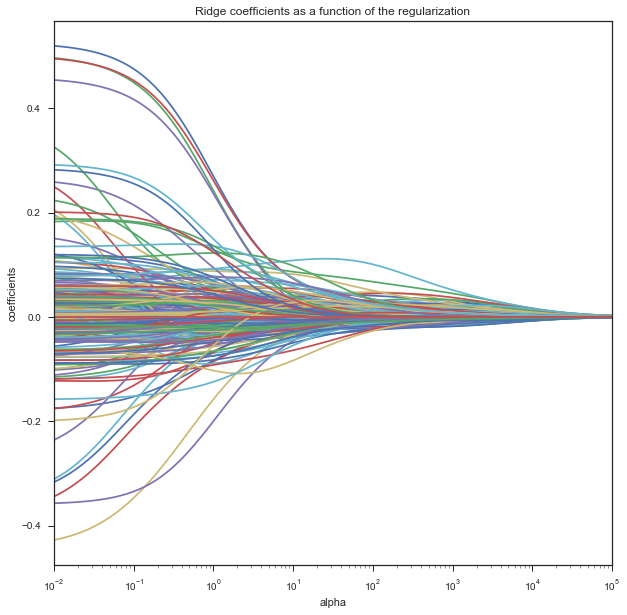

In [2906]:
alpha_100 = np.logspace(-2, 5, 100)
coef = []

for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(x_train, y_train)
    coef.append(ridge.coef_)

columns = x_train.columns
df_coef = pd.DataFrame(coef, index=alpha_100, columns=columns)
title = 'Ridge coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title, legend = False)

plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

In [2907]:
cv_Ridge = [rmse_cv(Ridge(alpha = Alpha)).mean() for Alpha in alpha_100]

**************************************************
Ridge CV:
Minumum RMSE 0.1253 
achieved at alpha = 17.8865
**************************************************


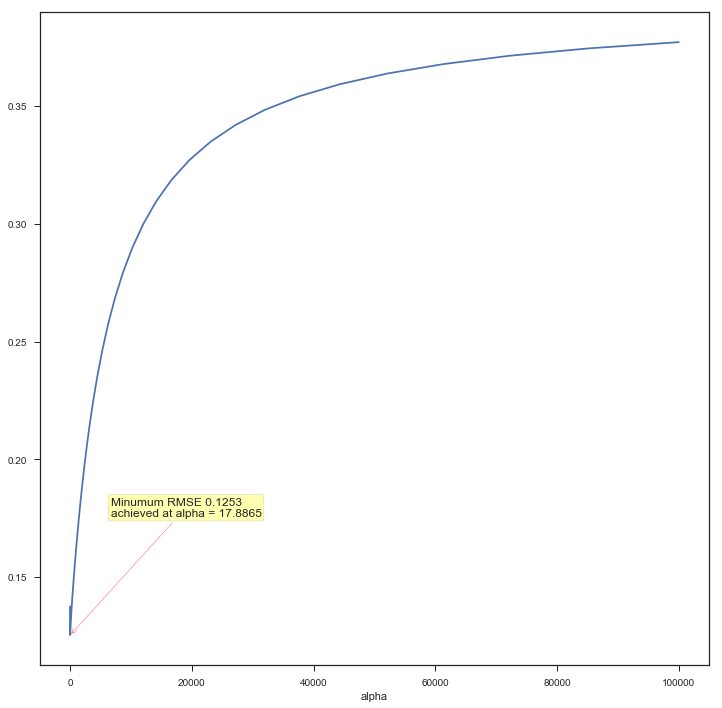

In [2908]:
cv_Ridge = pd.Series(cv_Ridge, index = alpha_100)

fig, ax = plt.subplots(figsize=(12,12));
ax.plot(alpha_100,cv_Ridge);
ax.set_xlabel('alpha')
#ax.set_ylabel('RMSE')
alpha0 = cv_Ridge[cv_Ridge == cv_Ridge.min()].index[0];
rmse0 = cv_Ridge.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {:.4f}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(alpha_100.mean(), cv_Ridge.mean()),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))

print('*'*50)
print('Ridge CV:')
print(s)
print('*'*50)

In [2909]:
# ridgemodel = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha =0.0005, random_state=1))

In [2910]:
# score = rmse_cv(ridgemodel)
# print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

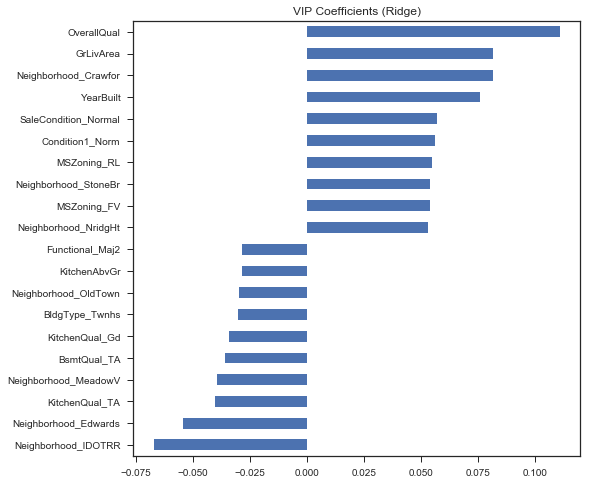

In [2911]:
model_Ridge = Ridge(alpha0).fit(x_train, y_train);

coeffs_Ridge = pd.Series(model_Ridge.coef_, index = public_x.columns);
vip_coeffs_Ridge = pd.concat([coeffs_Ridge.sort_values().head(10),
                              coeffs_Ridge.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Ridge.plot(kind = "barh");
plt.title("VIP Coefficients (Ridge)");

**************************************************
Ridge Performace: R^2 = 0.7832
**************************************************
Lasso Performace: RMSE = 0.1812
**************************************************


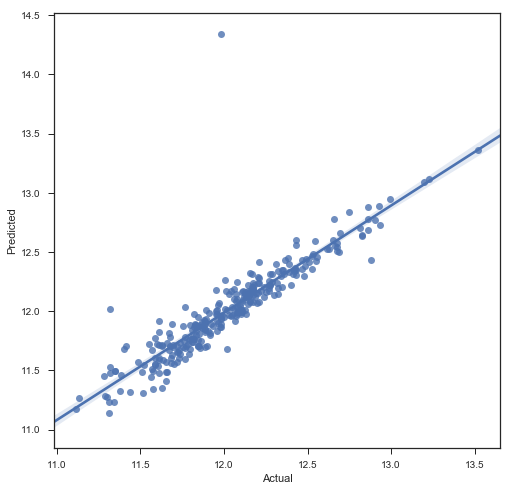

In [2912]:
predictions_Ridge = pd.DataFrame({"Predicted":model_Ridge.predict(x_test), 
                                  "Actual":y_test});
predictions_Ridge["Residual"] = predictions_Ridge.Actual - predictions_Ridge.Predicted;


print('*'*50)
print('Ridge Performace: R^2 = {:.4f}'.format(model_Ridge.score(x_test, y_test)))
print('*'*50)
print('Lasso Performace: RMSE = {:.4f}'.format(rmse(predictions_Ridge.Residual)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Ridge.Actual, predictions_Ridge.Predicted);
#ax.set_title('')

## 4.2 Regularized Linear Regression: Lasso

In [2913]:
from sklearn.linear_model import Lasso
lasso = Lasso()

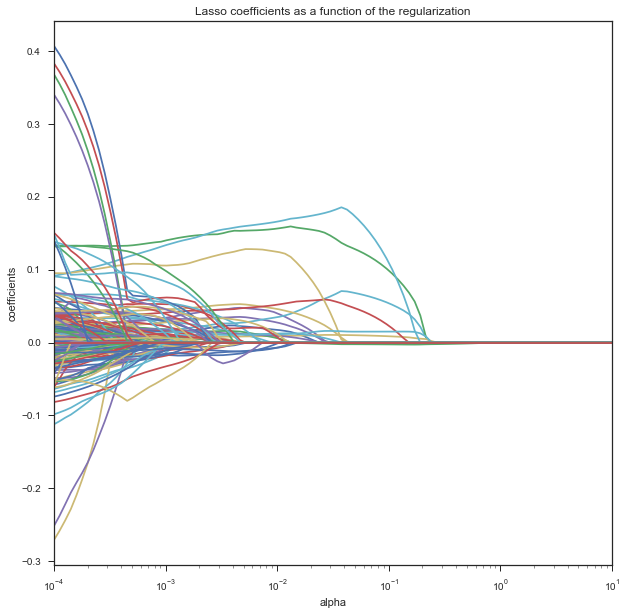

In [2914]:
alpha_100 = np.logspace(-4, 1, 100)
coef_lasso = []


for i in alpha_100:
    lasso.set_params(alpha = i)
    lasso.fit(x_train, y_train)
    coef_lasso.append(lasso.coef_)


columns = x_train.columns
df_coef = pd.DataFrame(coef_lasso, index=alpha_100, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title, legend = False)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()



In [2915]:
cv_Lasso = [rmse_cv(linear_model.Lasso(alpha = Alpha)).mean() for Alpha in alpha_100]

**************************************************
Lasso CV:
Minumum RMSE 0.1264 
achieved at alpha = 0.00020092330025650479
**************************************************


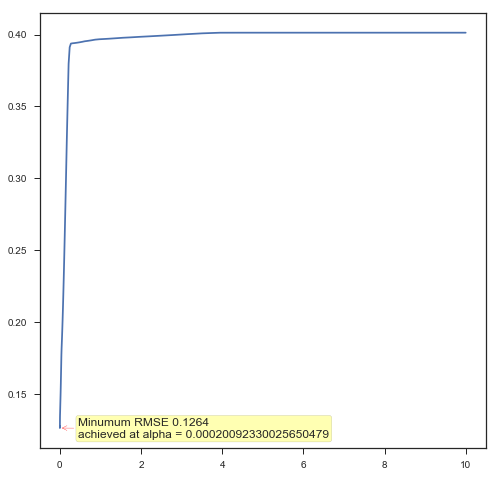

In [2916]:
cv_Lasso = pd.Series(cv_Lasso, index = alpha_100)

fig, ax = plt.subplots(figsize=(8,8));
ax.plot(alpha_100,cv_Lasso);

alpha0 = cv_Lasso[cv_Lasso == cv_Lasso.min()].index[0];
rmse0 = cv_Lasso.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(alpha_100.mean()/2, cv_Lasso.mean()/2),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))


print('*'*50)
print('Lasso CV:')
print(s)
print('*'*50)

In [2917]:
# ridgemodel = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha =0.0005, random_state=1))

In [2918]:
# score = rmse_cv(ridgemodel)
# print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

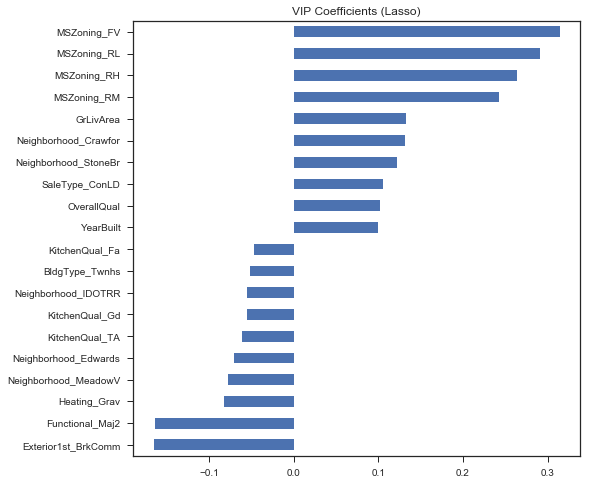

In [2919]:
model_Lasso = Lasso(alpha0).fit(x_train, y_train);


coeffs_Lasso = pd.Series(model_Lasso.coef_, index = public_x.columns);
vip_coeffs_Lasso = pd.concat([coeffs_Lasso.sort_values().head(10),
                              coeffs_Lasso.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Lasso.plot(kind = "barh");
plt.title("VIP Coefficients (Lasso)");

**************************************************
Lasso Performace: R^2 = 0.7764
**************************************************
Lasso Performace: RMSE = 0.1840
**************************************************


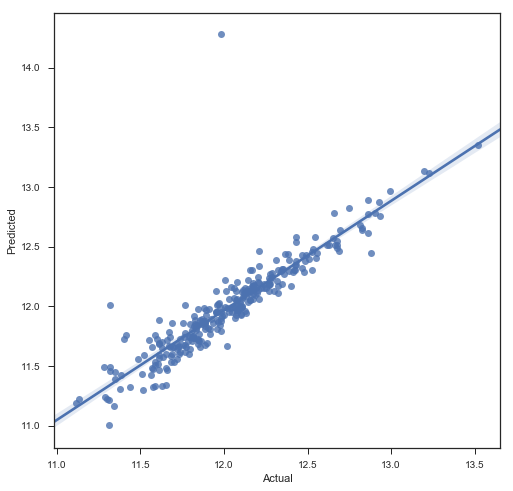

In [2920]:
predictions_Lasso = pd.DataFrame({"Predicted":model_Lasso.predict(x_test), 
                                  "Actual":y_test});
predictions_Lasso["Residual"] = predictions_Lasso.Actual - predictions_Lasso.Predicted;


print('*'*50)
print('Lasso Performace: R^2 = {:.4f}'.format(model_Lasso.score(x_test, y_test)))
print('*'*50)
print('Lasso Performace: RMSE = {:.4f}'.format(rmse(predictions_Lasso.Residual)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Lasso.Actual, predictions_Lasso.Predicted);
#ax.set_title('')

## 4.3 Regularized Linear Modeling: Elastic Net

In [2921]:
from sklearn import linear_model
elastic = linear_model.ElasticNet(alpha = 1)

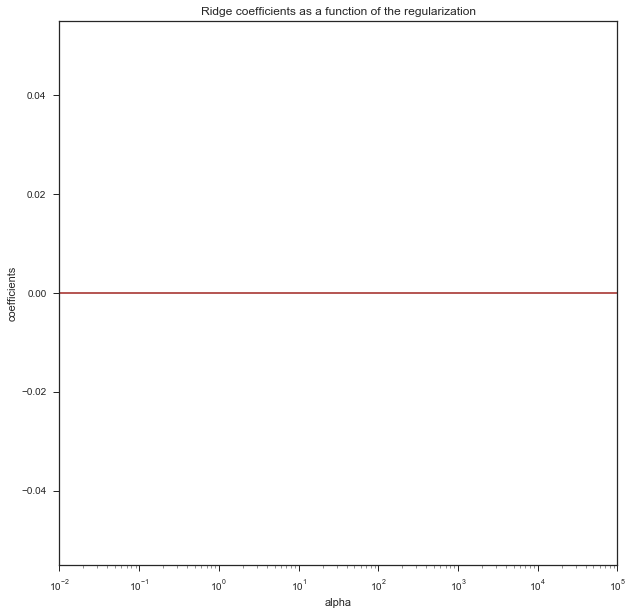

In [2855]:
alpha_100 = np.logspace(-2, 5, 100)
coef = []

for i in alpha_100:
    ridge.set_params(alpha = i)
    elastic.fit(x_train, y_train)
    coef.append(elastic.coef_)

columns = x_train.columns
df_coef = pd.DataFrame(coef, index=alpha_100, columns=columns)
title = 'Ridge coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title, legend = False)

plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

In [2838]:
cv_Ridge = [rmse_cv(Ridge(alpha = Alpha)).mean() for Alpha in alpha_100]

**************************************************
Ridge CV:
Minumum RMSE 0.1304 
achieved at alpha = 205.6512
**************************************************


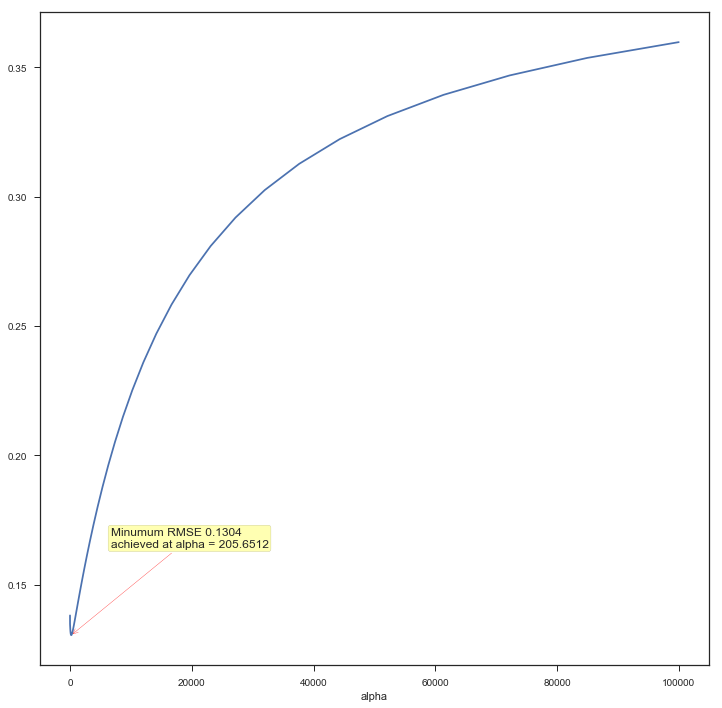

In [2839]:
cv_Ridge = pd.Series(cv_Ridge, index = alpha_100)

fig, ax = plt.subplots(figsize=(12,12));
ax.plot(alpha_100,cv_Ridge);
ax.set_xlabel('alpha')
#ax.set_ylabel('RMSE')
alpha0 = cv_Ridge[cv_Ridge == cv_Ridge.min()].index[0];
rmse0 = cv_Ridge.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {:.4f}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(alpha_100.mean(), cv_Ridge.mean()),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))

print('*'*50)
print('Ridge CV:')
print(s)
print('*'*50)

In [2840]:
# ridgemodel = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha =0.0005, random_state=1))

In [2841]:
# score = rmse_cv(ridgemodel)
# print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

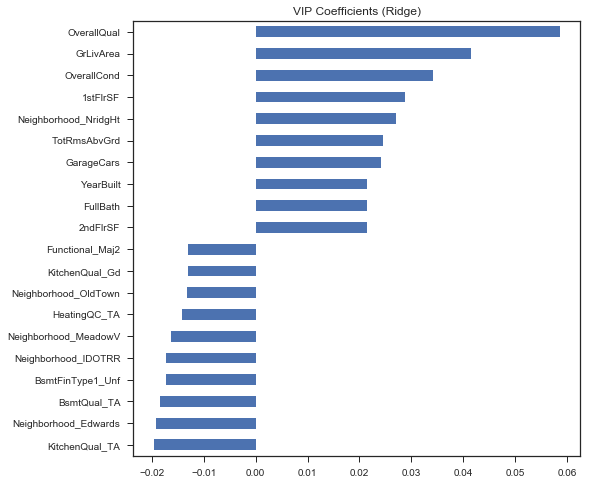

In [2842]:
model_Ridge = Ridge(alpha0).fit(public_x, public_y);

coeffs_Ridge = pd.Series(model_Ridge.coef_, index = public_x.columns);
vip_coeffs_Ridge = pd.concat([coeffs_Ridge.sort_values().head(10),
                              coeffs_Ridge.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Ridge.plot(kind = "barh");
plt.title("VIP Coefficients (Ridge)");

**************************************************
Ridge Performace: R^2 = 0.9153
**************************************************
Lasso Performace: RMSE = 0.1162
**************************************************


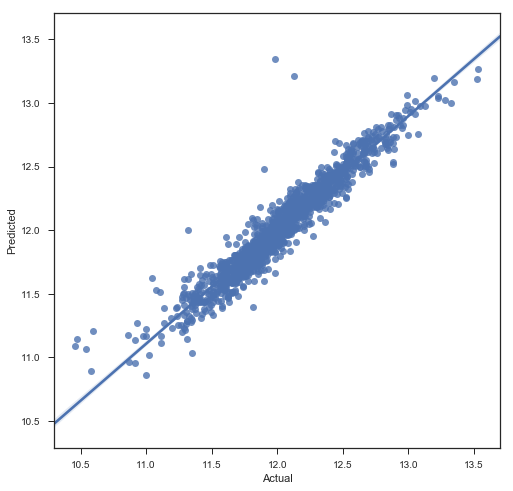

In [2843]:
predictions_Ridge = pd.DataFrame({"Predicted":model_Ridge.predict(public_x), 
                                  "Actual":public_y});
predictions_Ridge["Residual"] = predictions_Ridge.Actual - predictions_Ridge.Predicted;


print('*'*50)
print('Ridge Performace: R^2 = {:.4f}'.format(model_Ridge.score(public_x, public_y)))
print('*'*50)
print('Lasso Performace: RMSE = {:.4f}'.format(rmse(predictions_Ridge.Residual)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Ridge.Actual, predictions_Ridge.Predicted);
#ax.set_title('')

## “Why did you choose your methodology?”

## “How was this implemented?”

## “Why does this work?”

## “How did you verify results?”

## “Why is this method superior to what is used in the industry?”